- KEYWORDS: numpy.transpose, numpy.eye, numpy.diag, numpy.tri, @, numpy.transpose, numpy.allclose, numpy.linalg.det, numpy.linalg.inv, numpy.linalg.matrix_rank, numpy.linalg.cond, numpy.linalg.solve



# Multidimensional arrays



The foundation of linear algebra in Python is in multidimensional arrays.



In [2]:
import numpy as np

We make multidimensional arrays by using lists of lists of numbers. For example, here is a 2D array:



In [5]:
A = np.array([[1, 2, 4],
              [3, 4, 5]])

We can find out the shape of an array, i.e. the number of rows and columns from the shape attribute. It returns (rows, columns).



In [6]:
A.shape

(2, 3)


## Constructing arrays



You can always make arrays by typing them in. There are many convenient ways to make special ones though. For example, you can make an array of all ones or zeros with these:



In [1]:
np.zeros(shape=[3, 3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [1]:
np.ones(shape=[3, 3])

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

You can make an identity matrix with:



In [7]:
np.eye(N=4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

or a diagonal array:



In [1]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

If you need a lower triangular array:



In [1]:
np.tri(3)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

In [20]:
np.random.rand(3, 3)

array([[ 0.74736603,  0.10967269,  0.253464  ],
       [ 0.6983312 ,  0.52851546,  0.28729405],
       [ 0.95826464,  0.25240439,  0.71185231]])

In [11]:
np.array([np.array([1, 2]),
          np.array([3, 4])])

array([[1, 2],
       [3, 4]])


## Regular Algebra with arrays



It takes some getting use to how to use arrays with algebra.




### Addition and subtraction



Let's start with addition and subtraction. A good rule to remember that you can add and subtract arrays with the same shape.



In [24]:
A = np.array([[1, 2], 
              [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [1]:
B = np.ones(A.shape)

A + B

array([[ 2.,  3.],
       [ 4.,  5.]])

In [1]:
A - B

array([[ 0.,  1.],
       [ 2.,  3.]])

This is an error though because the shapes do not match.



In [34]:
C = np.array([[0, 0, 1],
              [1, 0, 0],
             ])

C.shape, C.dtype, C

((2, 3), dtype('int64'), array([[0, 0, 1],
        [1, 0, 0]]))

Note, however, that this is ok. This feature is called *broadcasting*. It works when the thing you are adding can be added to each row.



In [26]:
C + [2, 2, 2]

array([[2, 2, 3],
       [3, 2, 2]])

**Exercise** Use some algebra to get an array that is ones above the main diagonal, and zeros everywhere else.




### Multiplication and division



The default multiplication and division operators work *element-wise*.



In [1]:
2 * A

array([[2, 4],
       [6, 8]])

In [1]:
2 / A

array([[ 2.        ,  1.        ],
       [ 0.66666667,  0.5       ]])

In [1]:
A * B

array([[ 1.,  2.],
       [ 3.,  4.]])

In [1]:
B / A

array([[ 1.        ,  0.5       ],
       [ 0.33333333,  0.25      ]])

In [41]:
np.exp(A)

array([[  2.71828183,   7.3890561 ],
       [ 20.08553692,  54.59815003]])


## Matrix algebra



To do matrix multiplication you use the @ operator (This is new in Python 3.5), or the `numpy.dot` function. If you are not familiar with the idea of matrix multiplication you should review it at [https://en.wikipedia.org/wiki/Matrix_multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).

We write matrix multiplication as: $\mathbf{A} \mathbf{B}$. We cannot multiply any two arrays; their shapes must follow some rules. We can multiply any two arrays with these shapes:

(m, c) \* (c, n) = (m, n)

In other words the number of columns in the first array must equal the number of rows in the second array. This means it is not generally true that $\mathbf{A} \mathbf{B} = \mathbf{B} \mathbf{A}$.



In [1]:
A @ B

array([[ 3.,  3.],
       [ 7.,  7.]])

This is the older way to do matrix multiplication.



In [1]:
np.dot(A, B)

array([[ 3.,  3.],
       [ 7.,  7.]])

These rules are true:

1.  $(k \mathbf{A})\mathbf{B} = k(\mathbf{A} \mathbf{B}) = \mathbf{A}(k\mathbf{B})$
2.  $\mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C}$
3.  $(\mathbf{A} + \mathbf{B})\mathbf{C} = \mathbf{A}\mathbf{C} + \mathbf{B}\mathbf{C}$
4.  $\mathbf{C}(\mathbf{A} + \mathbf{B}) = \mathbf{C}\mathbf{A} + \mathbf{C}\mathbf{A}$

**Exercise** construct examples of each of these rules.

We can also multiply a matrix and vector. This is like the shapes of (m, r) \* (r, 1) = (m, 1)



In [46]:
k=7
A = np.random.rand(4, 4)
B = np.random.rand(4, 4)
np.set_printoptions(suppress=True)
np.allclose((k * A) @ B, k *(A @ B))

True

In [47]:
# Check rule 4
C = np.random.rand(4, 4)
np.allclose(C @ (A + B), C@A + C@B)

True

In [51]:
A = np.array([[1, 2], 
              [3, 4]])
x = np.array([1, 2])
A @ x

array([ 5, 11])

There is a small subtle point, the x-array is 1-D:



In [1]:
x.shape

(2,)

Its shape is not (2, 1)! Numpy does the right thing here and figures out what you want. Not all languages allow this, however, and you have to be careful that everything has the right shape with them.




# Linear algebra functions of arrays




## The transpose



In the transpose operation you swap the rows and columns of an array. The transpose of A is denoted $\mathbf{A}^T$.



In [53]:
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


There is also a function for transposing.



In [1]:
np.transpose(A)

array([[1, 3],
       [2, 4]])

A matrix is called *symmetric* if it is equal to its transpose: $\mathbf{A} == \mathbf{A}^T$.



In [1]:
Q = np.array([[1, 2],
              [2, 4]])

np.allclose(Q, Q.T)

True

A matrix is called *skew symmetric* if $\mathbf{A}^T = -\mathbf{A}$.



In [1]:
Q = np.array([[0, 1],
              [-1, 0]])

np.allclose(Q.T, -Q)

True

A matrix is called *orthogonal* if this equation is true: $\mathbf{A} \mathbf{A}^T = \mathbf{I}$. Here is an example of an orthogonal matrix:



In [56]:
theta = 12
Q = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

np.allclose(Q @ Q.T, np.eye(2))

True

Here are the four rules for matrix multiplication and transposition

1.  $(\mathbf{A}^T)^T = \mathbf{A}$

2.  $(\mathbf{A}+\mathbf{B})^T = \mathbf{A}^T+\mathbf{B}^T$

3.  $(\mathit{c}\mathbf{A})^T = \mathit{c}\mathbf{A}^T$

4.  $(\mathbf{AB})^T = \mathbf{B}^T\mathbf{A}^T$

**Exercise** Come up with an example for each rule.



In [63]:
B = np.random.rand(2, 2)
if np.allclose((A @ B).T, B.T @ A.T):
    print('Rule 4 is true')

Rule 4 is true



## The determinant



The determinant of a matrix is noted: det(A) or |A|. Many matrices are used to linearly transform vectors, and the determinant is related to the scaling magnitude.



In [1]:
np.linalg.det(A)

-2.0000000000000004


## The inverse



A matrix is invertible if and only if the determinant of the matrix is non-zero.

The inverse is defined by: $\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}$.

We compute the inverse as:



In [1]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

And here verify the definition.



In [64]:
A @ np.linalg.inv(A)

array([[ 1.,  0.],
       [ 0.,  1.]])

Another way to define an orthogonal matrix is $\mathbf{A}^T = \mathbf{A}^{-1}$.



In [1]:
theta = 12
Q = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

np.allclose(Q.T, np.linalg.inv(Q))

True


## Rank



The rank of a matrix is equal to the number of linearly independent rows in it. Rows are linearly independent if and only if they cannot be made by constants times another row or linear combinations of other rows.



In [65]:
A, np.linalg.matrix_rank(A)

(array([[1, 2],
        [3, 4]]), 2)

Here is an example of a rank-deficient array. The last row is a linear combination of the first two rows.



In [66]:
A1 = [[1, 2, 3],
      [0, 2, 3],
      [2, 6, 19]]

np.linalg.matrix_rank(A1)

3

Here is an example of a *rank-deficient* array. It is deficient because the last row is just 0 times any other row.



In [70]:
A1 = [[1, 2, 3],
      [0, 2, 3],
      [0, 0, 0]]

np.linalg.matrix_rank(A1)

2

Note the determinant of this array is nearly zero as a result.



In [71]:
np.linalg.det(A1)

0.0

Also note the inverse has some enormous numbers in it. This is not a reliable inverse. It is never a good idea to have giant numbers and small numbers in the same calculations!



In [69]:
np.linalg.inv(A1)

LinAlgError: Singular matrix

The condition number is a measure of the norm of an array times the inverse of the array. If it is very large, the array is said to be *ill-conditioned*.



In [72]:
np.linalg.cond(A1)

/Users/jkitchin/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


inf

What all of these mean is that we only have two independent rows in the array.




# Solving linear algebraic equations



One of the key reasons to develop the tools above is for solving linear equations. Let's consider an example.

Given these equations, find [x1, x2, x3]

\begin{eqnarray}
x_1 - x_2 + x_3 &=& 0 \\
10 x_2 + 25 x_3 &=& 90 \\
20 x_1 + 10 x_2 &=& 80
\end{eqnarray}

reference: Kreysig, Advanced Engineering Mathematics, 9th ed. Sec. 7.3

First, we express this in the form $\mathbf{A} \mathbf{x} = \mathbf{b}$.



In [74]:
A = np.array([[1, -1, 1],
              [0, 10, 25],
              [20, 10, 0]])

b = np.array([0, 90, 80])

Now, if we *left* multiply by $\mathbf{A}^{-1}$ then we get:

$\mathbf{A}^{-1} \mathbf{A} \mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$ which simplifies to:

$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$

How do we know if there should be a solution?  First we make the augmented matrix $\mathbf{A} | \mathbf{b}$. Note for this we need \mathbf{b} as a column vector. Here is one way to make that happen. We make it a row in a 2D array, and transpose that to make it a column.



In [75]:
Awiggle = np.hstack([A, np.array([b]).T])
Awiggle

array([[ 1, -1,  1,  0],
       [ 0, 10, 25, 90],
       [20, 10,  0, 80]])

If the rank of $\mathbf{A}$ and the rank of $\mathbf{\tilde{A}}$ are the same, then we will have one unique solution. if the rank is less than the number of unknowns, there maybe an infinite number of solutions.



In [76]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(Awiggle)

(3, 3)

If $\mathbf{b}$ is not all zeros, we can also use the fact that a non-zero determinant leads to a unique solution.



In [77]:
np.linalg.det(A)

-950.00000000000011

It should also be evident that since we use an inverse matrix, it must exist (which is certain since the determinant is non-zero). Now we can evaluate our solution.



In [78]:
x = np.linalg.inv(A) @ b
x

array([ 2.,  4.,  2.])

Now you might see why we *vastly* prefer linear algebra to nonlinear algebra; there is no guessing or iteration, we just solve the equations!

Let us confirm our solution:



In [81]:
np.set_printoptions(suppress=False)
A @ x, b

(array([  4.44089210e-16,   9.00000000e+01,   8.00000000e+01]),
 array([ 0, 90, 80]))

In [82]:
np.allclose?

This fails because of float tolerances:



In [1]:
A @ x - b

array([  4.44089210e-16,   0.00000000e+00,   0.00000000e+00])

We should instead see if they are all close. You could roll your own comparison, but we instead leverage `numpy.allclose` for this comparison.



In [83]:
np.allclose(A @ x, b)

True

The formula we used above to solve for $\mathbf{x}$ is not commonly used. It turns out computing the inverse of a matrix is moderately expensive. For small systems it is negligible, but the time to compute the inverse grows as $N^3$, and there are more efficient ways to solve these when the number of equations grows large.



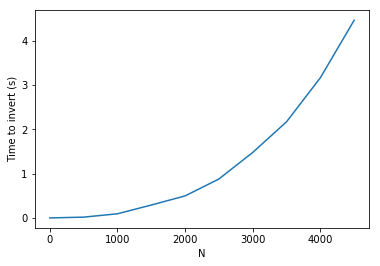

In [1]:
import numpy as np
import time

t = []
I = np.array(range(2, 5001, 500))
for i in I:
    m = np.eye(i)
    t0 = time.time()
    np.linalg.inv(m)
    t += [time.time() - t0]

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(I, t)
plt.xlabel('N')
plt.ylabel('Time to invert (s)')

As usual, there is a function we can use to solve this.



In [1]:
np.linalg.solve(A, b)

array([ 2.,  4.,  2.])

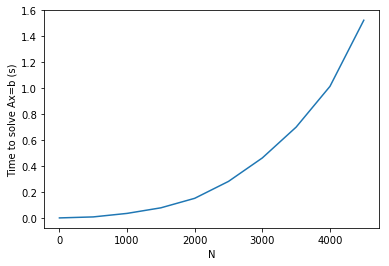

In [1]:
t = []
I = np.array(range(2, 5001, 500))
for i in I:
    A = np.eye(i)
    b = np.arange(i)
    t0 = time.time()
    np.linalg.solve(A, b)
    t += [time.time() - t0]


plt.plot(I, t)
plt.xlabel('N')
plt.ylabel('Time to solve Ax=b (s)')

You can see by inspection that solve must not be using an inverse to solve these equations; if it did, it would take much longer to solve them. It is remarkable that we can solve ~5000 simultaneous equations here in about 1 second!

This may seem like a lot of equations, but it isn't really. Problems of this size routinely come up in solving linear boundary value problems where you discretize the problem into a large number of linear equations that are solved.




# Summary



Today we introduced many functions used in linear algebra. One of the main applications of linear algebra is solving linear equations. These arise in many engineering applications like mass balances, reaction network analysis, etc. Because we can solve them directly (not iteratively with a guess like with non-linear algebra) it is highly desirable to formulate problems as linear ones where possible.

There are many more specialized routines at [https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html).

